##  Customer Segmentation Using K-Means Clustering
- Description: Develope a customer segmentation model using K-Means clustering to identify distinct customer groups based on
 purchasing behaviour.
- Technologies: Python, Scikit-Learn, Pandas, Matplotlib

In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [28]:
df = pd.read_csv('data.csv')

In [29]:
df.columns

Index(['user_id', 'age', 'annual_income', 'purchase_amount', 'loyalty_score',
       'region', 'purchase_frequency'],
      dtype='object')

In [30]:
df.shape

(238, 7)

In [31]:
df.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


In [32]:
df['age'].median() ,df['age'].mean()

(39.0, 38.6764705882353)

In [33]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


In [35]:
missing_data = df.isnull().sum()
missing_data

user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

## Scatter Plot: with K-Means Clustering
- *Annual Income vs. Purchase Amount*: Plotting these two features can help visualize the relationship between income and purchasing behavior. After applying K-Means clustering, color-code the points by cluster to see the distinct customer segments.
- *Age vs. Loyalty Score*: This can show how customer age correlates with their loyalty to the business. The clusters can reveal patterns in age groups.
- *Purchase Frequency vs. Purchase Amount*: This scatter plot will help understand how frequently customers make purchases in relation to the amount they spend.


In [36]:
def basic_chart(dataframe,col1,col2,clustersize):
# Assuming you have the data in a pandas DataFrame 'df'
    X = dataframe[[col1, col2]]

# Applying K-Means clustering with a chosen K
    kmeans = KMeans(n_clusters=clustersize , n_init='auto')  # Adjust K as needed
    df['Cluster'] = kmeans.fit_predict(X)

# Plotting the scatter plot
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col1, y=col2, hue='Cluster', data=df, palette='Set1', s=100)
    plt.title(f'{col1} vs. {col2} (with Clusters)')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

    
    



## The Elbow Method to decide on the optimal number of clusters by plotting the number of clusters (K) on the x-axis and the sum of squared distances (inertia) on the y-axis. The "elbow" point can help determine the best value of K for the model.

Index(['age', 'loyalty_score'], dtype='object') 



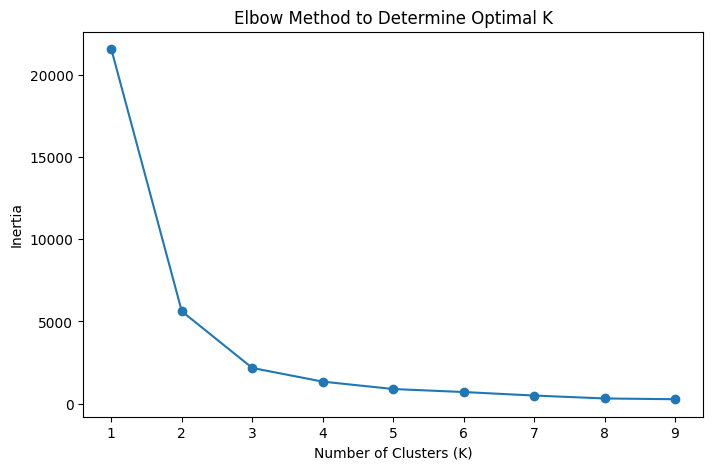

Index(['annual_income', 'purchase_amount'], dtype='object') 



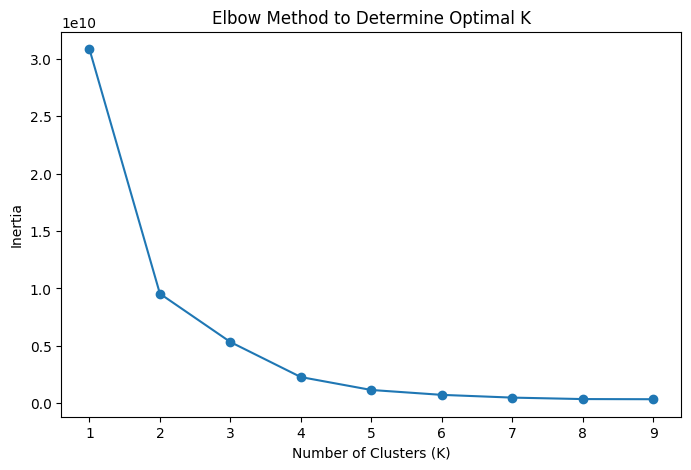

Index(['purchase_amount', 'purchase_frequency'], dtype='object') 



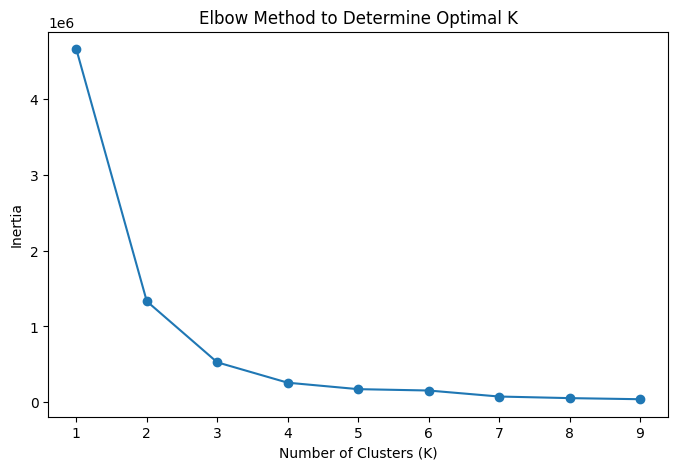

In [37]:
def elbow_method(X):
    print(X.columns,'\n')
    inertia = []
    K_range = range(1, 10)  # Test for 1 to 10 clusters
    for k in K_range:
        kmeans = KMeans(n_clusters=k , n_init='auto')
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    
    # Plotting the Elbow graph
    plt.figure(figsize=(8, 5))
    plt.plot(K_range, inertia, marker='o')
    plt.title('Elbow Method to Determine Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.show()

X = df[['age','loyalty_score']]
Y = df[['annual_income','purchase_amount']]
Z = df[['purchase_amount','purchase_frequency']]

elbow_method(X)
elbow_method(Y)
elbow_method(Z)

## Annual Income vs. Purchase Amount:

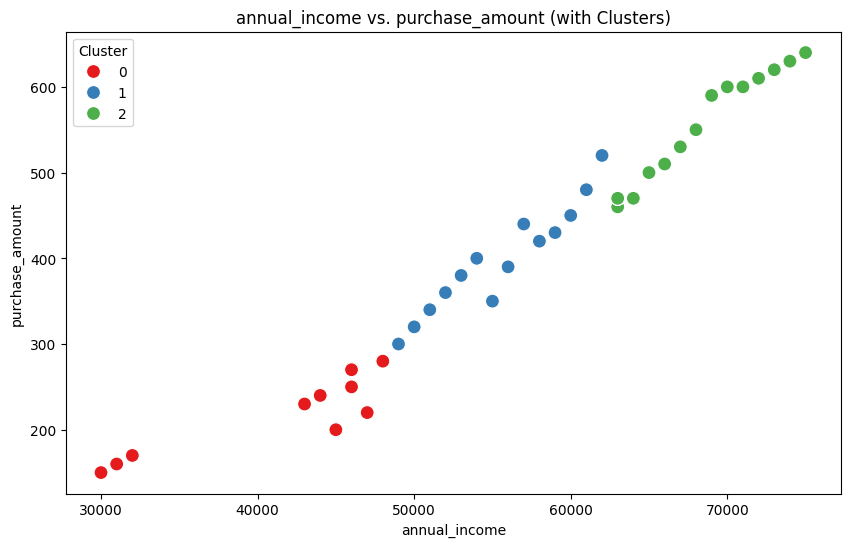

In [38]:
basic_chart(df,'annual_income','purchase_amount',3)

## Age Vs loyalty_score

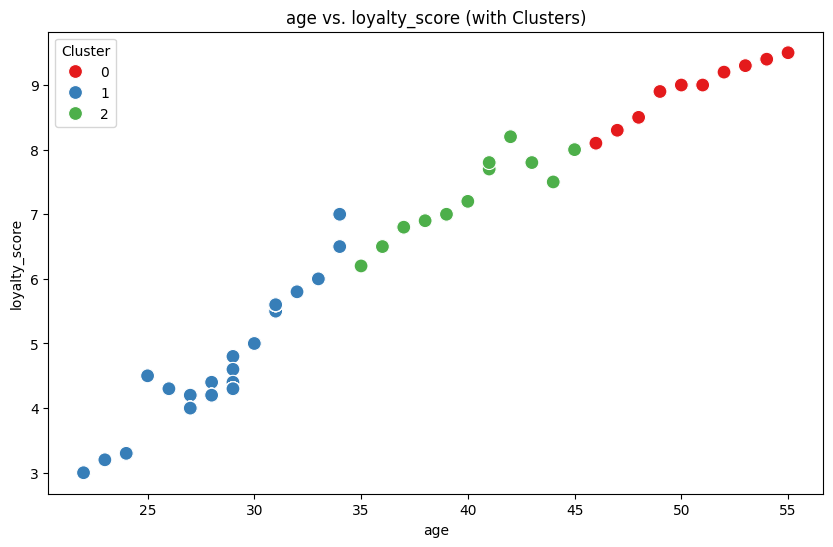

In [39]:
basic_chart(df,'age','loyalty_score',3)

## Purchase Frequency vs. Purchase Amount: 

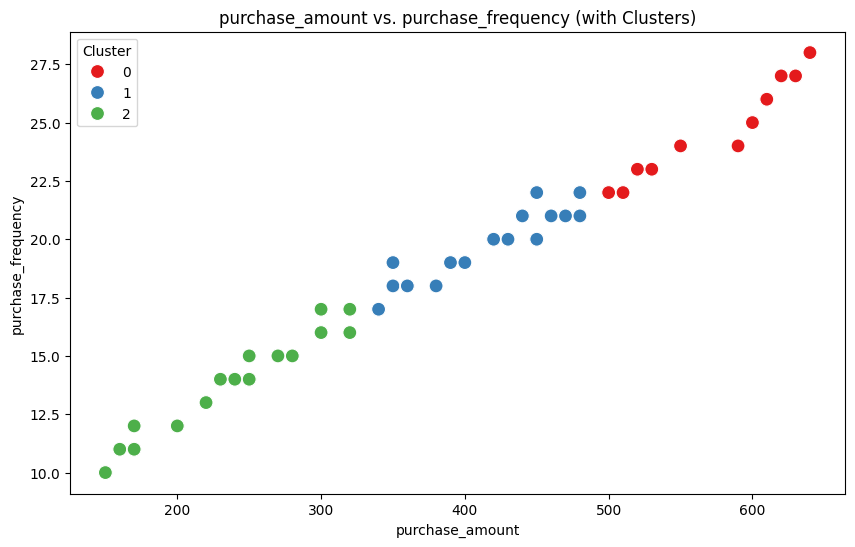

In [40]:
basic_chart(df,'purchase_amount','purchase_frequency',3)

## Feature Engineering 


In [41]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency,Cluster
0,1,25,45000,200,4.5,North,12,2
1,2,34,55000,350,7.0,South,18,1
2,3,45,65000,500,8.0,West,22,0
3,4,22,30000,150,3.0,East,10,2
4,5,29,47000,220,4.8,North,13,2


In [42]:
df['total_purchase'] = df.purchase_amount * df.purchase_frequency
df['total_purchase']

0       2400
1       6300
2      11000
3       1500
4       2860
       ...  
233     9000
234     8600
235    17010
236     6480
237     5780
Name: total_purchase, Length: 238, dtype: int64

In [43]:
df

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency,Cluster,total_purchase
0,1,25,45000,200,4.5,North,12,2,2400
1,2,34,55000,350,7.0,South,18,1,6300
2,3,45,65000,500,8.0,West,22,0,11000
3,4,22,30000,150,3.0,East,10,2,1500
4,5,29,47000,220,4.8,North,13,2,2860
...,...,...,...,...,...,...,...,...,...
233,234,40,60000,450,7.2,West,20,1,9000
234,235,38,59000,430,6.9,North,20,1,8600
235,236,54,74000,630,9.4,South,27,0,17010
236,237,32,52000,360,5.8,West,18,1,6480


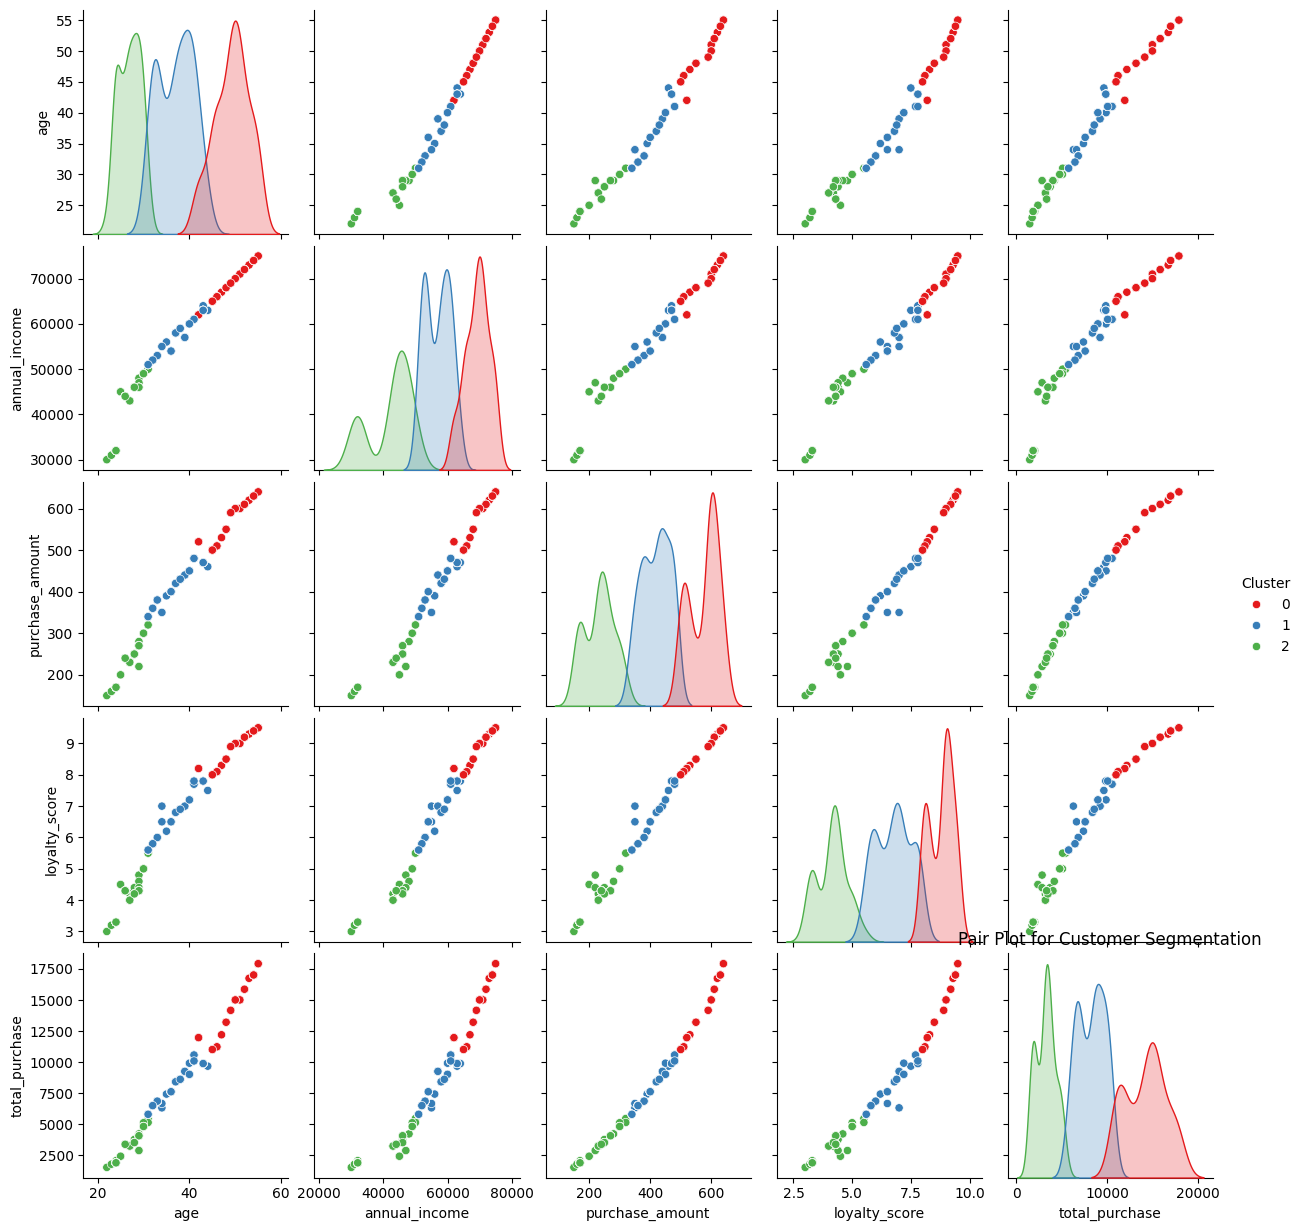

In [44]:
sns.pairplot(df, hue='Cluster', vars=['age', 'annual_income', 'purchase_amount', 'loyalty_score','total_purchase'], palette='Set1')
plt.title('Pair Plot for Customer Segmentation')
plt.show()

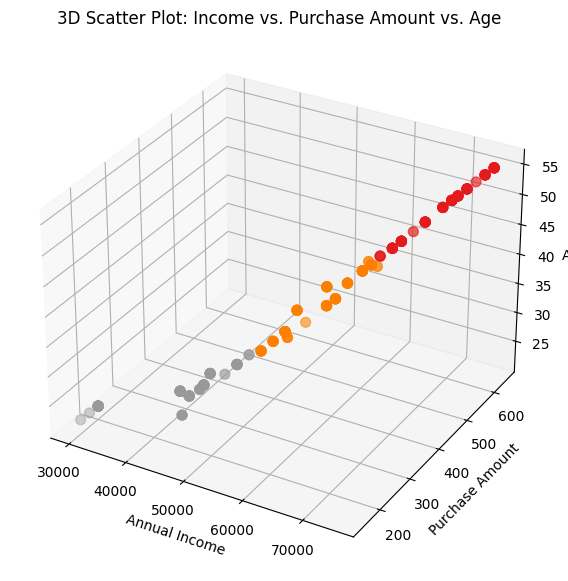

In [45]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter Plot
ax.scatter(df['annual_income'], df['purchase_amount'], df['age'], c=df['Cluster'], s=50, cmap='Set1')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Purchase Amount')
ax.set_zlabel('Age')
ax.set_title('3D Scatter Plot: Income vs. Purchase Amount vs. Age')

plt.show()

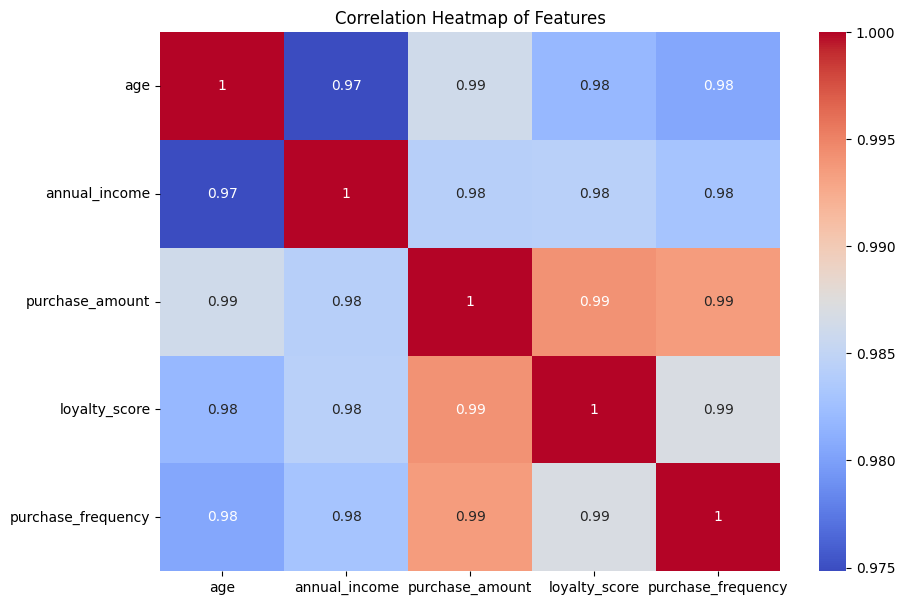

In [46]:
# Correlation Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(df[['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

## Region Distribution by cluster

In [47]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency,Cluster,total_purchase
0,1,25,45000,200,4.5,North,12,2,2400
1,2,34,55000,350,7.0,South,18,1,6300
2,3,45,65000,500,8.0,West,22,0,11000
3,4,22,30000,150,3.0,East,10,2,1500
4,5,29,47000,220,4.8,North,13,2,2860


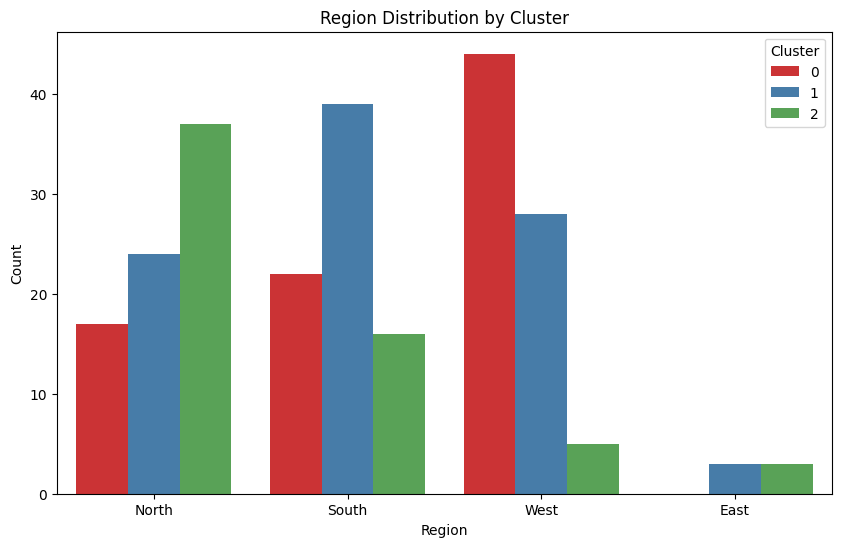

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='Cluster', data=df, palette='Set1')
plt.title('Region Distribution by Cluster')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Cluster Segmentation: Age vs Loyalty Score')

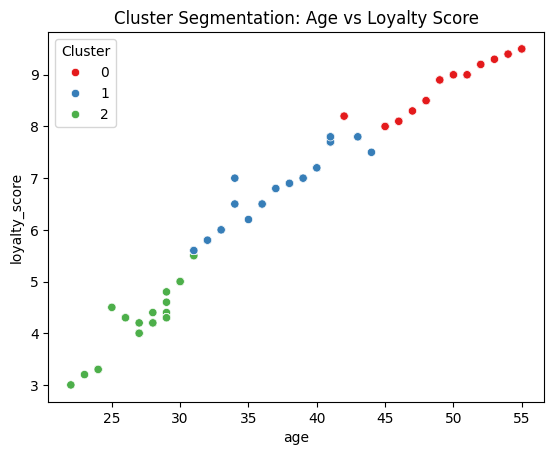

In [49]:
sns.scatterplot(x='age', y='loyalty_score', hue='Cluster', data=df, palette='Set1')
plt.title('Cluster Segmentation: Age vs Loyalty Score')

In [50]:
df['region'] = pd.to_numeric(df['region'], errors='coerce')

In [51]:
cluster_means = df.groupby('Cluster').mean()[['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']]
cluster_means

,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
Cluster,,,,,
0,49.228916,69228.915663,576.024096,8.787952,24.590361
1,36.989362,56851.063830,417.659574,6.757447,19.585106
2,26.918033,42180.327869,233.278689,4.137705,13.606557


In [52]:
df



,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency,Cluster,total_purchase
0,1,25,45000,200,4.5,NaN,12,2,2400
1,2,34,55000,350,7.0,NaN,18,1,6300
2,3,45,65000,500,8.0,NaN,22,0,11000
3,4,22,30000,150,3.0,NaN,10,2,1500
4,5,29,47000,220,4.8,NaN,13,2,2860
...,...,...,...,...,...,...,...,...,...
233,234,40,60000,450,7.2,NaN,20,1,9000
234,235,38,59000,430,6.9,NaN,20,1,8600
235,236,54,74000,630,9.4,NaN,27,0,17010
236,237,32,52000,360,5.8,NaN,18,1,6480
